In [128]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # Importa datetime
pd.set_option('max_columns', None)
import regex as re
import pycountry
from sklearn.preprocessing import StandardScaler

## MODELO PARA PREDECIR LA MIGRACIÓN NETA INGRESANDO VALORES DE AÑO E INDICADORES

En esta sección se construirá un modelo que prediga la migracion neta de un pais, ingresando el año y los indicadores correspondientes de dicho pais.
Para ello se utiliza el dataset llamado merged_df_modelo que tiene información de la migracion neta por año para todos los paises, junto con los valores de los indicadores.

In [3]:
merged_df_modelo=pd.read_csv('indicadores_modelo.csv')

In [4]:
merged_df_modelo.drop(columns='Unnamed: 0', inplace=True)

In [5]:
merged_df_modelo.isnull().sum()

Country Code                               0
Year                                       0
Ingresos                               16514
Electricidad                            9410
Contaminación                          13854
Crecimiento PBI                         4027
Crecimiento PBI per cápita              4028
Desempleo Hombre                       11961
Desempleo mujeres                       9246
Gasto PBI                              12025
Importaciones                           2634
Migracion neta                           328
Desempleados con educación avanzada    14248
Tasa de cambio                          5252
Pobreza                                15746
Mortalidad                               739
dtype: int64

In [6]:
umbral = len(merged_df_modelo.columns) * 0.7

In [7]:
merged_df_modelo_sin_80_na = merged_df_modelo.dropna(thresh=umbral)

In [8]:
merged_df_modelo_sin_80_na.shape

(3411, 16)

In [9]:
merged_df_modelo_sin_80_na.columns

Index(['Country Code', 'Year', 'Ingresos', 'Electricidad', 'Contaminación',
       'Crecimiento PBI', 'Crecimiento PBI per cápita', 'Desempleo Hombre',
       'Desempleo mujeres', 'Gasto PBI', 'Importaciones', 'Migracion neta',
       'Desempleados con educación avanzada', 'Tasa de cambio', 'Pobreza',
       'Mortalidad'],
      dtype='object')

In [10]:
merged_df_modelo_sin_80_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 7989 to 16491
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country Code                         3411 non-null   object 
 1   Year                                 3411 non-null   int64  
 2   Ingresos                             233 non-null    float64
 3   Electricidad                         3404 non-null   float64
 4   Contaminación                        1690 non-null   float64
 5   Crecimiento PBI                      3409 non-null   float64
 6   Crecimiento PBI per cápita           3409 non-null   float64
 7   Desempleo Hombre                     3033 non-null   float64
 8   Desempleo mujeres                    3365 non-null   float64
 9   Gasto PBI                            2898 non-null   float64
 10  Importaciones                        3398 non-null   float64
 11  Migracion neta            

## REALIZAR IMPUTACION DE VALORES FALTANTES CON KNN

In [11]:
from sklearn.impute import KNNImputer



# Columnas a imputar son las siguientes
columns_to_impute = ['Ingresos', 'Electricidad', 'Contaminación', 'Crecimiento PBI', 'Crecimiento PBI per cápita', 
                     'Desempleo Hombre', 'Desempleo mujeres', 'Gasto PBI', 'Importaciones', 
                     'Desempleados con educación avanzada', 'Tasa de cambio', 'Pobreza','Mortalidad']

# Copiar el DataFrame original para no modificarlo directamente
merged_df_modelo_sin_80_na_imputed = merged_df_modelo_sin_80_na.copy()

# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Elige el número de vecinos que deseas considerar

# Ajustar y transformar los datos utilizando KNNImputer
merged_df_modelo_sin_80_na_imputed[columns_to_impute] = imputer.fit_transform(merged_df_modelo_sin_80_na_imputed[columns_to_impute])



In [12]:
merged_df_modelo_sin_80_na_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 7989 to 16491
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country Code                         3411 non-null   object 
 1   Year                                 3411 non-null   int64  
 2   Ingresos                             3411 non-null   float64
 3   Electricidad                         3411 non-null   float64
 4   Contaminación                        3411 non-null   float64
 5   Crecimiento PBI                      3411 non-null   float64
 6   Crecimiento PBI per cápita           3411 non-null   float64
 7   Desempleo Hombre                     3411 non-null   float64
 8   Desempleo mujeres                    3411 non-null   float64
 9   Gasto PBI                            3411 non-null   float64
 10  Importaciones                        3411 non-null   float64
 11  Migracion neta            

In [13]:
merged_df_modelo_sin_80_na_imputed.head(3)

,Country Code,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI,Crecimiento PBI per cápita,Desempleo Hombre,Desempleo mujeres,Gasto PBI,Importaciones,Migracion neta,Desempleados con educación avanzada,Tasa de cambio,Pobreza,Mortalidad
7989,ARG,1990,10.840,92.1548,99.606700,-2.467214,-3.877390,7.13,27.4572,10.325440,4.076000e+09,6021.0,23.936,0.487589,29.74,7.743
7993,AUS,1990,18.524,100.0000,31.883404,3.576486,2.054794,6.74,22.8596,21.815482,4.198500e+10,95996.0,20.622,1.281057,26.88,7.000
7994,AUT,1990,15.520,100.0000,99.655570,4.345641,3.553548,3.02,22.7724,35.591270,4.914600e+10,59606.0,21.880,11.369833,30.50,10.800


In [144]:
merged_df_modelo_sin_80_na_imputed.describe()

,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI,Crecimiento PBI per cápita,Desempleo Hombre,Desempleo mujeres,Gasto PBI,Importaciones,Migracion neta,Desempleados con educación avanzada,Tasa de cambio,Pobreza,Mortalidad
count,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3.411000e+03,3.411000e+03,3411.000000,3411.000000,3411.000000,3411.000000
mean,2008.932864,21.209931,89.187482,95.185019,3.313998,2.257896,8.479077,9.150685,26.006826,4.448886e+11,1.057562e+05,11.316516,501.837178,26.706983,8.272603
std,7.945150,12.266561,21.823393,17.797112,4.376252,4.381742,5.593980,6.378180,12.468528,1.588820e+12,6.016791e+05,8.431731,2544.680180,7.653902,2.885991
min,1990.000000,1.000000,2.070949,0.000000,-54.235900,-55.090573,0.050000,0.172000,3.227370,5.000000e+07,-3.915894e+06,0.280000,0.000364,0.000000,0.820000
25%,2003.000000,10.840000,91.705167,99.927378,1.552869,0.557760,4.390000,4.644231,15.923170,6.068000e+09,-2.149150e+04,4.045000,1.406575,24.980000,6.177000
50%,2010.000000,17.874000,99.787872,100.000000,3.394236,2.322394,6.970000,7.396468,25.241663,2.683000e+10,2.510000e+02,7.200000,8.021241,26.800000,7.900000
75%,2015.000000,28.208000,100.000000,100.000000,5.464274,4.293155,10.924000,11.743000,34.724816,1.558195e+11,3.498900e+04,20.712000,65.432713,28.940000,9.900000
max,2021.000000,93.120000,100.000000,100.000000,86.826748,96.956420,36.800000,42.521000,98.105569,1.517041e+13,5.823473e+06,46.030000,42000.000000,76.800000,21.700000


In [14]:
# Ordenar el DataFrame por la columna 'Year'
merged_df_modelo_sin_80_na_imputed.sort_values('Year', inplace=True)

# Restablecer el índice
merged_df_modelo_sin_80_na_imputed.reset_index(drop=True, inplace=True)

## PRIMER AJUSTE CON BAGGINGREGRESSOR

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Eliminar las filas con valores nulos en la columna objetivo 'Migracion neta'
merged_df_modelo_sin_80_na_imputed.dropna(subset=['Migracion neta'], inplace=True)


# Definir tus características y etiquetas
X = merged_df_modelo_sin_80_na_imputed.drop(['Migracion neta'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = merged_df_modelo_sin_80_na_imputed['Migracion neta']  # Etiquetas

merged_df_modelo_sin_80_na_imputed.reset_index(drop=True, inplace=True)


# Dividir los datos en conjuntos de entrenamiento y prueba
X = pd.get_dummies(X, columns=['Country Code'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)

# Crear un modelo BaggingRegressor
bagging_model = BaggingRegressor(random_state=0)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)



In [146]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [147]:
mse

43975534805.57854

In [148]:
mae

92340.64626647146

In [149]:
r2

0.8691065233538974

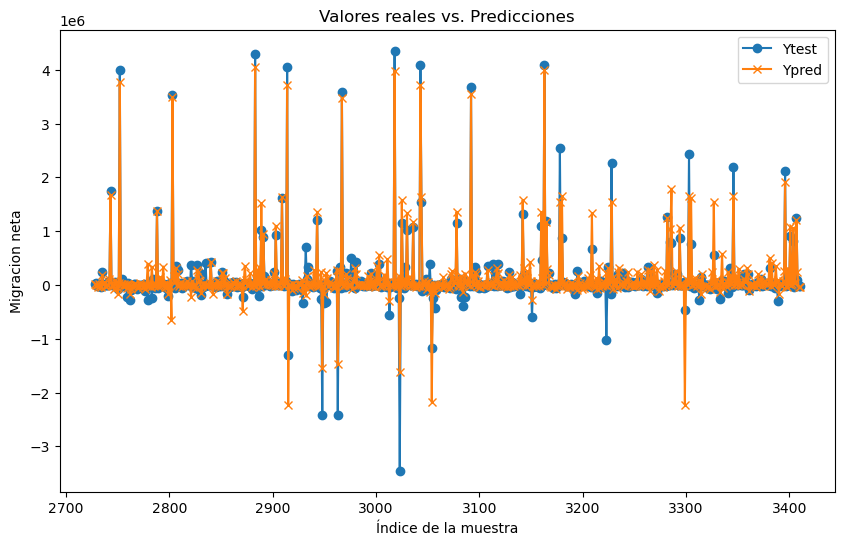

In [140]:
# Graficar Ytest y Ypred
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Ytest', marker='o')
plt.plot(y_test.index, y_pred, label='Ypred', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Migracion neta')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.show()

In [141]:
X_test.columns

Index(['Year', 'Ingresos', 'Electricidad', 'Contaminación', 'Crecimiento PBI',
       'Crecimiento PBI per cápita', 'Desempleo Hombre', 'Desempleo mujeres',
       'Gasto PBI', 'Importaciones',
       ...
       'Country Code_VCT', 'Country Code_VEN', 'Country Code_VNM',
       'Country Code_VUT', 'Country Code_WLD', 'Country Code_WSM',
       'Country Code_YEM', 'Country Code_ZAF', 'Country Code_ZMB',
       'Country Code_ZWE'],
      dtype='object', length=220)

In [155]:
results_pais[results_pais['Pais']==1]

,Y_test,Y_pred,Pais
2849,4926.0,29508.285714,1
2997,4690.0,18614.307692,1
3140,4478.0,37383.450549,1
3259,2344.0,77537.912088,1
3375,2344.0,41809.032967,1


NameError: name 'Argentina' is not defined

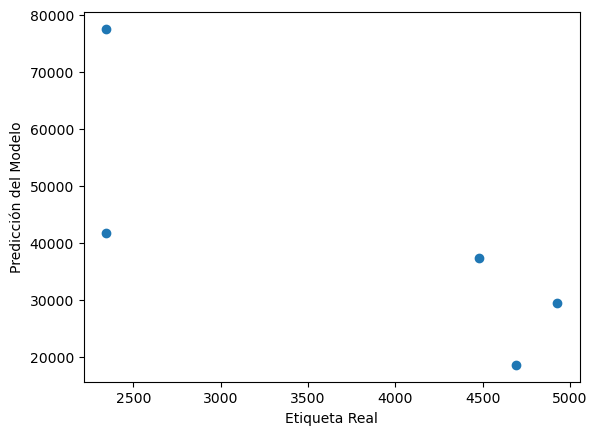

In [157]:

results_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred_optuna, 'Pais': X_test['Country Code_ARG']})

# Filtrar los resultados para un país específico
pais_seleccionado = 1  # Reemplaza con el nombre de tu país de interés
results_pais = results_df[results_df['Pais'] == pais_seleccionado]

#Visualizar los resultados (puedes ajustar esto según tus necesidades)
plt.scatter(results_pais['Y_test'], results_pais['Y_pred'])
plt.xlabel('Etiqueta Real')
plt.ylabel('Predicción del Modelo')
plt.title(f'Predicciones para {Argentina}')
plt.show()


In [150]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Definir espacio de búsqueda de hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.1, 1.0)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)

    # Crear modelo BaggingRegressor con hiperparámetros sugeridos
    bagging_model = BaggingRegressor(
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        random_state=0
    )

    # Evaluar el modelo utilizando validación cruzada
    scores = cross_val_score(bagging_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Devolver la métrica de rendimiento (en este caso, negativo del error cuadrático medio)
    return -scores.mean()

# Configurar y ejecutar el optimizador de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
best_params = study.best_params
print(f"Mejores hiperparámetros: {best_params}")

# Crear un modelo BaggingRegressor con los mejores hiperparámetros
best_bagging_model = BaggingRegressor(
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    random_state=0
)

# Entrenar el modelo con los datos de entrenamiento
best_bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_optuna = best_bagging_model.predict(X_test)


[I 2023-11-12 21:02:33,445] A new study created in memory with name: no-name-ad8bcffd-4d3d-4d89-b460-b09554dee69b
[I 2023-11-12 21:02:34,245] Trial 0 finished with value: 121112530239.12117 and parameters: {'n_estimators': 34, 'max_samples': 0.17929357132298301, 'max_features': 0.31890217178715974}. Best is trial 0 with value: 121112530239.12117.
[I 2023-11-12 21:02:39,148] Trial 1 finished with value: 62848810405.27145 and parameters: {'n_estimators': 28, 'max_samples': 0.9144230397144734, 'max_features': 0.5668572168259364}. Best is trial 1 with value: 62848810405.27145.
[I 2023-11-12 21:02:41,034] Trial 2 finished with value: 107829743710.70291 and parameters: {'n_estimators': 40, 'max_samples': 0.349016029876585, 'max_features': 0.30436606770636104}. Best is trial 1 with value: 62848810405.27145.
[I 2023-11-12 21:03:01,852] Trial 3 finished with value: 56807071687.01632 and parameters: {'n_estimators': 88, 'max_samples': 0.9454013821382468, 'max_features': 0.7197932615909034}. Best

Mejores hiperparámetros: {'n_estimators': 91, 'max_samples': 0.9084439940955996, 'max_features': 0.8016689182803238}


In [245]:
final_accuracy = accuracy_score(y_test, y_pred_optuna)
print(f"Precisión del modelo final: {final_accuracy}")

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Modelo para etiquetar migracion en positiva o negativa de acuerdo a indicadores

In [240]:
merged_df_modelo_sin_80_na_imputed['positiva']=merged_df_modelo_sin_80_na_imputed.apply(lambda x: 1 if x['Migracion neta']>0 else 0, axis=1)

In [241]:
merged_df_modelo_sin_80_na_imputed

,Country Code,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI,Crecimiento PBI per cápita,Desempleo Hombre,Desempleo mujeres,Gasto PBI,Importaciones,Migracion neta,Desempleados con educación avanzada,Tasa de cambio,Pobreza,Mortalidad,positiva
0,ARG,1990,10.840,92.154800,99.606700,-2.467214,-3.877390,7.130000,27.457200,10.325440,4.076000e+09,6021.0,23.936000,0.487589,29.74,7.743000,1
1,USA,1990,26.042,100.000000,47.997737,1.885965,0.741486,5.700000,25.235600,21.558929,5.169870e+11,1421775.0,21.784000,1.000000,25.94,8.600000,1
2,SWE,1990,17.114,100.000000,7.235441,0.754675,-0.020759,1.760000,24.864600,35.173870,5.426400e+10,17724.0,22.078000,5.918790,27.72,11.100000,1
3,PRT,1990,18.326,100.000000,54.494496,3.950523,4.177328,3.270000,22.789200,32.322300,2.526300e+10,-33704.0,23.794000,142.554750,33.48,10.300000,0
4,NOR,1990,18.170,100.000000,33.311551,1.932291,1.582093,5.570000,15.264600,38.094794,2.723100e+10,1895.0,22.846000,6.259742,28.52,10.900000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,ECU,2021,18.326,100.000000,100.000000,4.235251,3.010378,3.680000,5.709000,32.230867,2.569000e+10,35894.0,6.340000,1.000000,27.70,6.719000,1
3407,ECS,2021,51.442,99.987618,100.000000,5.974170,5.938008,6.915889,7.119552,39.271938,8.515908e+12,1242327.0,6.818381,19.420834,26.34,11.849752,1
3408,ECA,2021,41.202,99.971452,100.000000,7.432166,7.237998,7.240568,7.425425,30.101786,9.229652e+11,92645.0,8.667714,19.395126,26.30,12.501382,1
3409,GTM,2021,16.334,97.865654,99.927378,8.002408,6.415406,1.790000,3.844000,13.266085,2.660700e+10,-29118.0,2.590000,7.734388,28.70,6.504000,0


In [251]:
import optuna
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Definir tus características y etiquetas
X = merged_df_modelo_sin_80_na_imputed.drop(['Migracion neta','positiva'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = merged_df_modelo_sin_80_na_imputed['positiva']  # Etiquetas

merged_df_modelo_sin_80_na_imputed.reset_index(drop=True, inplace=True)


# Dividir los datos en conjuntos de entrenamiento y prueba
X = pd.get_dummies(X, columns=['Country Code'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)



def objective(trial):
    # Hiperparámetros a optimizar para Bagging
    n_estimators_bagging = trial.suggest_int('n_estimators_bagging', 10, 100)
    max_samples_bagging = trial.suggest_float('max_samples_bagging', 0.1, 1.0)
    
    # Hiperparámetros a optimizar para XGBoost
    n_estimators_xgboost = trial.suggest_int('n_estimators_xgboost', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    # Crear el modelo de Bagging con un clasificador XGBoost como base
    base_model = XGBClassifier(n_estimators=n_estimators_xgboost, learning_rate=learning_rate, max_depth=max_depth)
    bagging_model = BaggingClassifier(base_model, n_estimators=n_estimators_bagging, max_samples=max_samples_bagging)

    # Entrenar el modelo
    bagging_model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = bagging_model.predict(X_test)

    # Calcular la precisión para la optimización de Optuna
    accuracy = accuracy_score(y_test, y_pred)
    return 1.0 - accuracy  # Minimizar el error, maximizar la precisión

# Configurar y ejecutar el optimizador de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
best_params = study.best_params
print(f"Mejores hiperparámetros: {best_params}")

# Crear el modelo final con los mejores hiperparámetros
final_base_model = XGBClassifier(n_estimators=best_params['n_estimators_xgboost'],
                                  learning_rate=best_params['learning_rate'],
                                  max_depth=best_params['max_depth'])
final_model = BaggingClassifier(final_base_model, n_estimators=best_params['n_estimators_bagging'],
                                max_samples=best_params['max_samples_bagging'])

# Entrenar el modelo final con todos los datos de entrenamiento
final_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_final = final_model.predict(X_test)


[I 2023-11-13 08:38:11,845] A new study created in memory with name: no-name-8e8d9d46-1aa2-42c8-b700-368ad0534f74
[I 2023-11-13 08:38:22,414] Trial 0 finished with value: 0.21669106881405564 and parameters: {'n_estimators_bagging': 43, 'max_samples_bagging': 0.8705973767966921, 'n_estimators_xgboost': 51, 'learning_rate': 0.08543541925303688, 'max_depth': 9}. Best is trial 0 with value: 0.21669106881405564.
[I 2023-11-13 08:39:06,054] Trial 1 finished with value: 0.20497803806734993 and parameters: {'n_estimators_bagging': 90, 'max_samples_bagging': 0.9142283276417811, 'n_estimators_xgboost': 69, 'learning_rate': 0.07584878581148957, 'max_depth': 9}. Best is trial 1 with value: 0.20497803806734993.
[I 2023-11-13 08:39:14,141] Trial 2 finished with value: 0.19765739385065884 and parameters: {'n_estimators_bagging': 30, 'max_samples_bagging': 0.8854411942149361, 'n_estimators_xgboost': 81, 'learning_rate': 0.09079001010047498, 'max_depth': 7}. Best is trial 2 with value: 0.19765739385065

Mejores hiperparámetros: {'n_estimators_bagging': 51, 'max_samples_bagging': 0.9864822540555603, 'n_estimators_xgboost': 99, 'learning_rate': 0.09941704869308293, 'max_depth': 7}


NameError: name 'X_train_scaled' is not defined

In [252]:
final_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.09941704869308293,
   

In [253]:
y_pred_final = final_model.predict(X_test)

In [254]:
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Precisión del modelo final: {final_accuracy}")

Precisión del modelo final: 0.8067349926793558


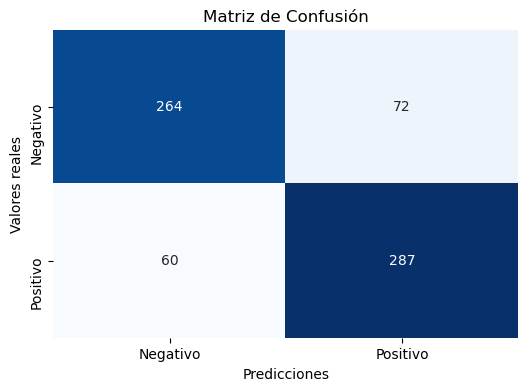

In [256]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba con el modelo final
y_pred_final = final_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


In [257]:
modelo_guardado = final_model.fit(X_train, y_train)

# con XGboost

In [275]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Definir tus características y etiquetas
X = merged_df_modelo_sin_80_na_imputed.drop(['Migracion neta', 'positiva','Desempleo Hombre', 'Desempleo mujeres','Tasa de cambio', 'Crecimiento PBI'], axis=1)  
y = merged_df_modelo_sin_80_na_imputed['positiva']

merged_df_modelo_sin_80_na_imputed.reset_index(drop=True, inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = pd.get_dummies(X, columns=['Country Code'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False, random_state=0)

def objective(trial):
    # Hiperparámetros a optimizar para XGBoost
    n_estimators_xgboost = trial.suggest_int('n_estimators_xgboost', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    # Crear el modelo XGBoost
    xgb_model = XGBClassifier(n_estimators=n_estimators_xgboost, learning_rate=learning_rate, max_depth=max_depth)

    # Entrenar el modelo
    xgb_model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = xgb_model.predict(X_test)

    # Calcular la precisión para la optimización de Optuna
    accuracy = accuracy_score(y_test, y_pred)
    return 1.0 - accuracy  # Minimizar el error, maximizar la precisión

# Configurar y ejecutar el optimizador de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
best_params = study.best_params
print(f"Mejores hiperparámetros: {best_params}")

# Crear el modelo final con los mejores hiperparámetros
final_model = XGBClassifier(n_estimators=best_params['n_estimators_xgboost'],
                             learning_rate=best_params['learning_rate'],
                             max_depth=best_params['max_depth'])

# Entrenar el modelo final con todos los datos de entrenamiento
modelo_clas_XG = final_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_final = final_model.predict(X_test)


[I 2023-11-13 09:46:01,908] A new study created in memory with name: no-name-90e0893e-ac7f-4b94-a3c9-59f3ac2f52be
[I 2023-11-13 09:46:02,047] Trial 0 finished with value: 0.23865300146412882 and parameters: {'n_estimators_xgboost': 63, 'learning_rate': 0.0650568588918309, 'max_depth': 3}. Best is trial 0 with value: 0.23865300146412882.
[I 2023-11-13 09:46:02,342] Trial 1 finished with value: 0.20497803806734993 and parameters: {'n_estimators_xgboost': 85, 'learning_rate': 0.06438721012042525, 'max_depth': 6}. Best is trial 1 with value: 0.20497803806734993.
[I 2023-11-13 09:46:02,777] Trial 2 finished with value: 0.1961932650073206 and parameters: {'n_estimators_xgboost': 79, 'learning_rate': 0.07253577325715772, 'max_depth': 8}. Best is trial 2 with value: 0.1961932650073206.
[I 2023-11-13 09:46:03,106] Trial 3 finished with value: 0.1961932650073206 and parameters: {'n_estimators_xgboost': 77, 'learning_rate': 0.09010294835551, 'max_depth': 6}. Best is trial 2 with value: 0.19619326

Mejores hiperparámetros: {'n_estimators_xgboost': 100, 'learning_rate': 0.09987562752977339, 'max_depth': 10}


In [276]:
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Precisión del modelo final: {final_accuracy}")

Precisión del modelo final: 0.828696925329429


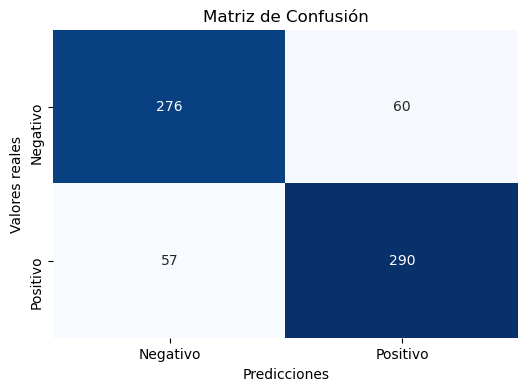

In [277]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba con el modelo final
y_pred_final = final_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

In [278]:
modelo_clas_XG.save_model('modelo_clas_XG.json')

In [279]:
X

,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI per cápita,Gasto PBI,Importaciones,Desempleados con educación avanzada,Pobreza,Mortalidad,Country Code_AFG,Country Code_AGO,Country Code_ALB,Country Code_ARB,Country Code_ARE,Country Code_ARG,Country Code_ARM,Country Code_AUS,Country Code_AUT,Country Code_AZE,Country Code_BDI,Country Code_BEL,Country Code_BEN,Country Code_BFA,Country Code_BGD,Country Code_BGR,Country Code_BHR,Country Code_BHS,Country Code_BIH,Country Code_BLR,Country Code_BLZ,Country Code_BMU,Country Code_BOL,Country Code_BRA,Country Code_BRB,Country Code_BRN,Country Code_BTN,Country Code_BWA,Country Code_CAF,Country Code_CAN,Country Code_CEB,Country Code_CHE,Country Code_CHL,Country Code_CHN,Country Code_CIV,Country Code_CMR,Country Code_COD,Country Code_COG,Country Code_COL,Country Code_COM,Country Code_CPV,Country Code_CRI,Country Code_CSS,Country Code_CUB,Country Code_CYP,Country Code_CZE,Country Code_DEU,Country Code_DJI,Country Code_DNK,Country Code_DOM,Country Code_DZA,Country Code_EAR,Country Code_ECA,Country Code_ECS,Country Code_ECU,Country Code_EGY,Country Code_EMU,Country Code_ESP,Country Code_EST,Country Code_ETH,Country Code_EUU,Country Code_FIN,Country Code_FJI,Country Code_FRA,Country Code_FSM,Country Code_GAB,Country Code_GBR,Country Code_GEO,Country Code_GHA,Country Code_GIN,Country Code_GMB,Country Code_GNB,Country Code_GNQ,Country Code_GRC,Country Code_GTM,Country Code_GUM,Country Code_GUY,Country Code_HIC,Country Code_HKG,Country Code_HND,Country Code_HRV,Country Code_HTI,Country Code_HUN,Country Code_IDB,Country Code_IDN,Country Code_IND,Country Code_IRL,Country Code_IRN,Country Code_IRQ,Country Code_ISL,Country Code_ISR,Country Code_ITA,Country Code_JAM,Country Code_JOR,Country Code_JPN,Country Code_KAZ,Country Code_KEN,Country Code_KGZ,Country Code_KHM,Country Code_KIR,Country Code_KOR,Country Code_KWT,Country Code_LAC,Country Code_LAO,Country Code_LBN,Country Code_LBR,Country Code_LBY,Country Code_LCA,Country Code_LCN,Country Code_LKA,Country Code_LMC,Country Code_LSO,Country Code_LTU,Country Code_LUX,Country Code_LVA,Country Code_MAC,Country Code_MAR,Country Code_MDA,Country Code_MDG,Country Code_MDV,Country Code_MEX,Country Code_MHL,Country Code_MKD,Country Code_MLI,Country Code_MLT,Country Code_MMR,Country Code_MNA,Country Code_MNE,Country Code_MNG,Country Code_MOZ,Country Code_MRT,Country Code_MUS,Country Code_MWI,Country Code_MYS,Country Code_NAC,Country Code_NAM,Country Code_NER,Country Code_NGA,Country Code_NIC,Country Code_NLD,Country Code_NOR,Country Code_NPL,Country Code_NZL,Country Code_OED,Country Code_OMN,Country Code_PAK,Country Code_PAN,Country Code_PER,Country Code_PHL,Country Code_PLW,Country Code_PNG,Country Code_POL,Country Code_PRT,Country Code_PRY,Country Code_PSE,Country Code_PST,Country Code_QAT,Country Code_ROU,Country Code_RUS,Country Code_RWA,Country Code_SAS,Country Code_SAU,Country Code_SDN,Country Code_SEN,Country Code_SGP,Country Code_SLB,Country Code_SLE,Country Code_SLV,Country Code_SRB,Country Code_STP,Country Code_SUR,Country Code_SVK,Country Code_SVN,Country Code_SWE,Country Code_SWZ,Country Code_SYC,Country Code_SYR,Country Code_TCD,Country Code_TEC,Country Code_TGO,Country Code_THA,Country Code_TJK,Country Code_TLA,Country Code_TLS,Country Code_TMN,Country Code_TON,Country Code_TSA,Country Code_TTO,Country Code_TUN,Country Code_TUR,Country Code_TZA,Country Code_UGA,Country Code_UKR,Country Code_URY,Country Code_USA,Country Code_UZB,Country Code_VCT,Country Code_VEN,Country Code_VNM,Country Code_VUT,Country Code_WLD,Country Code_WSM,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE
0,1990,10.840,92.154800,99.606700,-3.877390,10.325440,4.076000e+09,23.936000,29.74,7.743000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [280]:
columnas=X.columns

In [281]:
columnas

Index(['Year', 'Ingresos', 'Electricidad', 'Contaminación',
       'Crecimiento PBI per cápita', 'Gasto PBI', 'Importaciones',
       'Desempleados con educación avanzada', 'Pobreza', 'Mortalidad',
       ...
       'Country Code_VCT', 'Country Code_VEN', 'Country Code_VNM',
       'Country Code_VUT', 'Country Code_WLD', 'Country Code_WSM',
       'Country Code_YEM', 'Country Code_ZAF', 'Country Code_ZMB',
       'Country Code_ZWE'],
      dtype='object', length=216)

In [282]:
df = pd.DataFrame([0]*len(columnas), index=columnas).T

In [283]:
df

,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI per cápita,Gasto PBI,Importaciones,Desempleados con educación avanzada,Pobreza,Mortalidad,Country Code_AFG,Country Code_AGO,Country Code_ALB,Country Code_ARB,Country Code_ARE,Country Code_ARG,Country Code_ARM,Country Code_AUS,Country Code_AUT,Country Code_AZE,Country Code_BDI,Country Code_BEL,Country Code_BEN,Country Code_BFA,Country Code_BGD,Country Code_BGR,Country Code_BHR,Country Code_BHS,Country Code_BIH,Country Code_BLR,Country Code_BLZ,Country Code_BMU,Country Code_BOL,Country Code_BRA,Country Code_BRB,Country Code_BRN,Country Code_BTN,Country Code_BWA,Country Code_CAF,Country Code_CAN,Country Code_CEB,Country Code_CHE,Country Code_CHL,Country Code_CHN,Country Code_CIV,Country Code_CMR,Country Code_COD,Country Code_COG,Country Code_COL,Country Code_COM,Country Code_CPV,Country Code_CRI,Country Code_CSS,Country Code_CUB,Country Code_CYP,Country Code_CZE,Country Code_DEU,Country Code_DJI,Country Code_DNK,Country Code_DOM,Country Code_DZA,Country Code_EAR,Country Code_ECA,Country Code_ECS,Country Code_ECU,Country Code_EGY,Country Code_EMU,Country Code_ESP,Country Code_EST,Country Code_ETH,Country Code_EUU,Country Code_FIN,Country Code_FJI,Country Code_FRA,Country Code_FSM,Country Code_GAB,Country Code_GBR,Country Code_GEO,Country Code_GHA,Country Code_GIN,Country Code_GMB,Country Code_GNB,Country Code_GNQ,Country Code_GRC,Country Code_GTM,Country Code_GUM,Country Code_GUY,Country Code_HIC,Country Code_HKG,Country Code_HND,Country Code_HRV,Country Code_HTI,Country Code_HUN,Country Code_IDB,Country Code_IDN,Country Code_IND,Country Code_IRL,Country Code_IRN,Country Code_IRQ,Country Code_ISL,Country Code_ISR,Country Code_ITA,Country Code_JAM,Country Code_JOR,Country Code_JPN,Country Code_KAZ,Country Code_KEN,Country Code_KGZ,Country Code_KHM,Country Code_KIR,Country Code_KOR,Country Code_KWT,Country Code_LAC,Country Code_LAO,Country Code_LBN,Country Code_LBR,Country Code_LBY,Country Code_LCA,Country Code_LCN,Country Code_LKA,Country Code_LMC,Country Code_LSO,Country Code_LTU,Country Code_LUX,Country Code_LVA,Country Code_MAC,Country Code_MAR,Country Code_MDA,Country Code_MDG,Country Code_MDV,Country Code_MEX,Country Code_MHL,Country Code_MKD,Country Code_MLI,Country Code_MLT,Country Code_MMR,Country Code_MNA,Country Code_MNE,Country Code_MNG,Country Code_MOZ,Country Code_MRT,Country Code_MUS,Country Code_MWI,Country Code_MYS,Country Code_NAC,Country Code_NAM,Country Code_NER,Country Code_NGA,Country Code_NIC,Country Code_NLD,Country Code_NOR,Country Code_NPL,Country Code_NZL,Country Code_OED,Country Code_OMN,Country Code_PAK,Country Code_PAN,Country Code_PER,Country Code_PHL,Country Code_PLW,Country Code_PNG,Country Code_POL,Country Code_PRT,Country Code_PRY,Country Code_PSE,Country Code_PST,Country Code_QAT,Country Code_ROU,Country Code_RUS,Country Code_RWA,Country Code_SAS,Country Code_SAU,Country Code_SDN,Country Code_SEN,Country Code_SGP,Country Code_SLB,Country Code_SLE,Country Code_SLV,Country Code_SRB,Country Code_STP,Country Code_SUR,Country Code_SVK,Country Code_SVN,Country Code_SWE,Country Code_SWZ,Country Code_SYC,Country Code_SYR,Country Code_TCD,Country Code_TEC,Country Code_TGO,Country Code_THA,Country Code_TJK,Country Code_TLA,Country Code_TLS,Country Code_TMN,Country Code_TON,Country Code_TSA,Country Code_TTO,Country Code_TUN,Country Code_TUR,Country Code_TZA,Country Code_UGA,Country Code_UKR,Country Code_URY,Country Code_USA,Country Code_UZB,Country Code_VCT,Country Code_VEN,Country Code_VNM,Country Code_VUT,Country Code_WLD,Country Code_WSM,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [284]:
df.to_csv('para_llenar_calsificacion')

In [273]:
merged_df_modelo_sin_80_na_imputed.describe()

,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI,Crecimiento PBI per cápita,Desempleo Hombre,Desempleo mujeres,Gasto PBI,Importaciones,Migracion neta,Desempleados con educación avanzada,Tasa de cambio,Pobreza,Mortalidad,positiva
count,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3.411000e+03,3.411000e+03,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000
mean,2008.932864,21.209931,89.187482,95.185019,3.313998,2.257896,8.479077,9.150685,26.006826,4.448886e+11,1.057562e+05,11.316516,501.837178,26.706983,8.272603,0.507183
std,7.945150,12.266561,21.823393,17.797112,4.376252,4.381742,5.593980,6.378180,12.468528,1.588820e+12,6.016791e+05,8.431731,2544.680180,7.653902,2.885991,0.500022
min,1990.000000,1.000000,2.070949,0.000000,-54.235900,-55.090573,0.050000,0.172000,3.227370,5.000000e+07,-3.915894e+06,0.280000,0.000364,0.000000,0.820000,0.000000
25%,2003.000000,10.840000,91.705167,99.927378,1.552869,0.557760,4.390000,4.644231,15.923170,6.068000e+09,-2.149150e+04,4.045000,1.406575,24.980000,6.177000,0.000000
50%,2010.000000,17.874000,99.787872,100.000000,3.394236,2.322394,6.970000,7.396468,25.241663,2.683000e+10,2.510000e+02,7.200000,8.021241,26.800000,7.900000,1.000000
75%,2015.000000,28.208000,100.000000,100.000000,5.464274,4.293155,10.924000,11.743000,34.724816,1.558195e+11,3.498900e+04,20.712000,65.432713,28.940000,9.900000,1.000000
max,2021.000000,93.120000,100.000000,100.000000,86.826748,96.956420,36.800000,42.521000,98.105569,1.517041e+13,5.823473e+06,46.030000,42000.000000,76.800000,21.700000,1.000000


In [274]:
merged_df_modelo_sin_80_na_imputed[merged_df_modelo_sin_80_na_imputed['Country Code']=='ARG'].describe()

,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI,Crecimiento PBI per cápita,Desempleo Hombre,Desempleo mujeres,Gasto PBI,Importaciones,Migracion neta,Desempleados con educación avanzada,Tasa de cambio,Pobreza,Mortalidad,positiva
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2005.451613,20.716000,96.823356,99.338121,2.290876,1.164495,10.584645,12.918748,17.158281,3.835529e+10,-9336.935484,12.648839,11.017127,29.037419,7.649677,0.354839
std,9.531837,6.311552,2.665285,1.508737,6.066891,6.018303,4.323151,4.916013,5.194012,2.201598e+10,11736.877978,9.128105,21.716197,3.681361,0.324124,0.486373
min,1990.000000,10.840000,92.154800,93.852825,-10.894485,-11.845950,5.330000,5.748000,7.183922,4.076000e+09,-22787.000000,2.920000,0.487589,24.940000,7.369000,0.000000
25%,1997.500000,16.841000,94.653507,99.489027,-2.489915,-3.590095,6.890000,9.232000,14.648915,2.092350e+10,-20363.500000,3.705000,0.999500,26.920000,7.487000,0.000000
50%,2005.000000,18.670000,96.725266,100.000000,2.818503,1.757648,9.180000,12.390000,15.511231,3.140400e+10,-12450.000000,11.680000,3.054313,28.000000,7.549000,0.000000
75%,2013.500000,24.794000,99.487404,100.000000,8.079099,6.785409,13.505000,16.090500,21.485665,5.883350e+10,3802.500000,21.604000,6.767314,29.570000,7.670500,1.000000
max,2021.000000,41.238000,100.000000,100.000000,10.398249,9.844296,20.130000,27.457200,26.179916,7.444200e+10,6021.000000,25.014000,94.990742,42.000000,8.955000,1.000000


# Regresion

In [291]:


# Definir tus características y etiquetas
X = merged_df_modelo_sin_80_na_imputed.drop(['Migracion neta', 'positiva','Desempleo Hombre', 'Desempleo mujeres','Tasa de cambio', 'Crecimiento PBI'], axis=1)  
y = merged_df_modelo_sin_80_na_imputed['Migracion neta']  # Cambiado a la variable de regresión

merged_df_modelo_sin_80_na_imputed.reset_index(drop=True, inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba

X = pd.get_dummies(X, columns=['Country Code'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


def objective(trial):
    # Hiperparámetros a optimizar para XGBoost
    n_estimators_xgboost = trial.suggest_int('n_estimators_xgboost', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    # Crear el modelo XGBoost para regresión
    xgb_model = XGBRegressor(n_estimators=n_estimators_xgboost, learning_rate=learning_rate, max_depth=max_depth)

    # Entrenar el modelo
    xgb_model.fit(X_train_scaled, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = xgb_model.predict(X_test_scaled)

    # Calcular la métrica de error para la optimización de Optuna
    mse = mean_squared_error(y_test, y_pred)
    return mse  # Minimizar el error cuadrático medio

# Configurar y ejecutar el optimizador de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros encontrados
best_params = study.best_params
print(f"Mejores hiperparámetros: {best_params}")

# Crear el modelo final con los mejores hiperparámetros
final_model = XGBRegressor(n_estimators=best_params['n_estimators_xgboost'],
                           learning_rate=best_params['learning_rate'],
                           max_depth=best_params['max_depth'])

# Entrenar el modelo final con todos los datos de entrenamiento
modelo_reg_XG = final_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_final = final_model.predict(X_test_scaled)
# Calcular el MAE con el modelo final
mae_final = mean_absolute_error(y_test, y_pred_final)

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("MAE con los mejores hiperparámetros:", mae_final)


[I 2023-11-13 10:22:42,948] A new study created in memory with name: no-name-9c06ec64-3648-4a39-aaeb-63969bbd813a
[I 2023-11-13 10:22:43,304] Trial 0 finished with value: 65772806009.55796 and parameters: {'n_estimators_xgboost': 93, 'learning_rate': 0.08909270049751908, 'max_depth': 10}. Best is trial 0 with value: 65772806009.55796.
[I 2023-11-13 10:22:43,348] Trial 1 finished with value: 119719361906.72581 and parameters: {'n_estimators_xgboost': 13, 'learning_rate': 0.08418241327726718, 'max_depth': 3}. Best is trial 0 with value: 65772806009.55796.
[I 2023-11-13 10:22:43,407] Trial 2 finished with value: 161448100089.32764 and parameters: {'n_estimators_xgboost': 12, 'learning_rate': 0.04900084541793238, 'max_depth': 8}. Best is trial 0 with value: 65772806009.55796.
[I 2023-11-13 10:22:43,620] Trial 3 finished with value: 83886099075.19817 and parameters: {'n_estimators_xgboost': 78, 'learning_rate': 0.02240610457136077, 'max_depth': 8}. Best is trial 0 with value: 65772806009.55

Mejores hiperparámetros: {'n_estimators_xgboost': 93, 'learning_rate': 0.08552219502575584, 'max_depth': 10}
Mejores hiperparámetros: {'n_estimators_xgboost': 93, 'learning_rate': 0.08552219502575584, 'max_depth': 10}
MAE con los mejores hiperparámetros: 101726.10899002277


Text(0, 0.5, 'Predicción del Modelo')

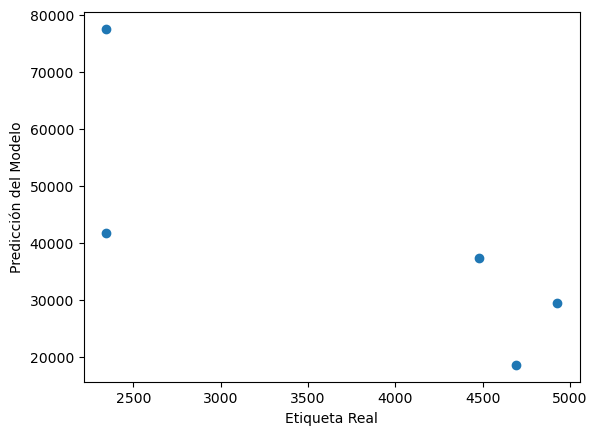

In [293]:
results_df = pd.DataFrame({'Y_test': y_test, 'Y_pred_final': y_pred_optuna, 'Pais': X_test['Country Code_ARG']})

# Filtrar los resultados para un país específico
pais_seleccionado = 1  # Reemplaza con el nombre de tu país de interés
results_pais = results_df[results_df['Pais'] == pais_seleccionado]

#Visualizar los resultados (puedes ajustar esto según tus necesidades)
plt.scatter(results_pais['Y_test'], results_pais['Y_pred_final'])
plt.xlabel('Etiqueta Real')
plt.ylabel('Predicción del Modelo')

## MODELO PARA PREDECIR STOCK DE MIGRANTES INGRESANDO PAIS DE ORIGEN, PAIS DE DESTINO E INDICADORES DE AMBOS

En esta sección se construirá un modelo que prediga la cantidad de migrantes que existe entre dos paises, ingresando el año, pais destino, pais origen e indicadores de ambos paises. 
Para ello se utiliza el dataset llamado Stock_migrantes que tiene información de cantidade de migrantes para pares de pais origen y destino, jutno con los indicadores de cada pais involucrado en el flujo.

In [21]:
Stock_migrantes=pd.read_csv('Stock_migrantes.csv')

In [22]:
Stock_migrantes.head(3)

,Unnamed: 0,Destination,Notes of destination,Location code of destination,ISO3_dest,Type of data of destination,Origin,Location code of origin,ISO3_origin,Year,Migrant stock
0,0,Burundi,NaN,108,BDI,B R,Belgium,56,BEL,1990,642
1,1,Burundi,NaN,108,BDI,B R,Democratic Republic of the Congo,180,COD,1990,36654
2,2,Burundi,NaN,108,BDI,B R,France*,250,FRA,1990,321


In [23]:
Stock_migrantes[Stock_migrantes['ISO3_origin']=='ARG']

,Unnamed: 0,Destination,Notes of destination,Location code of destination,ISO3_dest,Type of data of destination,Origin,Location code of origin,ISO3_origin,Year,Migrant stock
447,447,Egypt,NaN,818,EGY,B R,Argentina,32,ARG,1990,322
786,786,Namibia,NaN,516,NAM,B R,Argentina,32,ARG,1990,74
869,869,South Africa,NaN,710,ZAF,B R,Argentina,32,ARG,1990,623
1033,1033,Cabo Verde,NaN,132,CPV,B R,Argentina,32,ARG,1990,5
1140,1140,Guinea,NaN,324,GIN,C B R,Argentina,32,ARG,1990,0
...,...,...,...,...,...,...,...,...,...,...,...
82640,82640,Venezuela (Bolivarian Republic of),NaN,862,VEN,B R,Argentina,32,ARG,2020,9374
82791,82791,Canada,NaN,124,CAN,B,Argentina,32,ARG,2020,20921
83011,83011,United States of America*,33.0,840,USA,B,Argentina,32,ARG,2020,219448
83164,83164,Australia*,NaN,36,AUS,B,Argentina,32,ARG,2020,17900


In [24]:
Stock_migrantes.drop(columns='Unnamed: 0',inplace=True)

## uniones para llegar a dataset final

In [25]:
# Primera unión con las claves (left Country Code rigth ISO3_origin, Year)
merged_df_modelo_stock1 = pd.merge(Stock_migrantes, merged_df_modelo, left_on=['ISO3_origin', 'Year'], right_on=['Country Code', 'Year'], how='left')

# Segunda unión con las claves (Year, left Country Code, rigth ISO3_dest)
final_merged_df = pd.merge(merged_df_modelo_stock1, merged_df_modelo, left_on=['Year', 'ISO3_dest'], right_on=['Year', 'Country Code'], suffixes=('_origin', '_dest'), how='left')

In [26]:
final_merged_df.head(3)

,Destination,Notes of destination,Location code of destination,ISO3_dest,Type of data of destination,Origin,Location code of origin,ISO3_origin,Year,Migrant stock,Country Code_origin,Ingresos_origin,Electricidad_origin,Contaminación_origin,Crecimiento PBI_origin,Crecimiento PBI per cápita_origin,Desempleo Hombre_origin,Desempleo mujeres_origin,Gasto PBI_origin,Importaciones_origin,Migracion neta_origin,Desempleados con educación avanzada_origin,Tasa de cambio_origin,Pobreza_origin,Mortalidad_origin,Country Code_dest,Ingresos_dest,Electricidad_dest,Contaminación_dest,Crecimiento PBI_dest,Crecimiento PBI per cápita_dest,Desempleo Hombre_dest,Desempleo mujeres_dest,Gasto PBI_dest,Importaciones_dest,Migracion neta_dest,Desempleados con educación avanzada_dest,Tasa de cambio_dest,Pobreza_dest,Mortalidad_dest
0,Burundi,NaN,108,BDI,B R,Belgium,56,BEL,1990,642,BEL,NaN,100.0,99.869095,3.137402,2.830268,4.55,NaN,NaN,NaN,6752.0,NaN,3.341792e+01,NaN,10.400,BDI,NaN,NaN,100.0,3.499822,1.421896,0.72,NaN,NaN,231000000.0,-39996.0,NaN,171.255417,NaN,19.067
1,Burundi,NaN,108,BDI,B R,Democratic Republic of the Congo,180,COD,1990,36654,COD,NaN,NaN,100.000000,-6.568311,-9.584213,NaN,NaN,NaN,1.739000e+09,183750.0,NaN,2.394748e-09,NaN,16.833,BDI,NaN,NaN,100.0,3.499822,1.421896,0.72,NaN,NaN,231000000.0,-39996.0,NaN,171.255417,NaN,19.067
2,Burundi,NaN,108,BDI,B R,France*,250,FRA,1990,321,FRA,NaN,100.0,99.774451,2.923935,2.430247,7.17,NaN,38.949132,2.344360e+11,11404.0,NaN,5.445275e+00,NaN,9.300,BDI,NaN,NaN,100.0,3.499822,1.421896,0.72,NaN,NaN,231000000.0,-39996.0,NaN,171.255417,NaN,19.067


In [27]:
final_merged_df.columns

Index(['Destination', 'Notes of destination', 'Location code of destination',
       'ISO3_dest', 'Type of data of destination', 'Origin',
       'Location code of origin', 'ISO3_origin', 'Year', 'Migrant stock',
       'Country Code_origin', 'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Migracion neta_origin', 'Desempleados con educación avanzada_origin',
       'Tasa de cambio_origin', 'Pobreza_origin', 'Mortalidad_origin',
       'Country Code_dest', 'Ingresos_dest', 'Electricidad_dest',
       'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Migracion neta_dest', 'Desempleados con educación avanzada_dest',
       'Tasa de cambio_des

In [28]:
final_modelo_stock=final_merged_df[['Destination',
       'ISO3_dest','Origin', 'ISO3_origin', 'Year', 'Migrant stock',
       'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin',
       'Tasa de cambio_origin', 'Pobreza_origin', 'Mortalidad_origin',
       'Ingresos_dest', 'Electricidad_dest',
       'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest',
       'Tasa de cambio_dest', 'Pobreza_dest', 'Mortalidad_dest']]

In [29]:
umbral_stock = len(merged_df_modelo.columns) * 0.7

In [30]:
final_modelo_stock_sin_80_na = final_modelo_stock.dropna(thresh=umbral)

In [31]:
final_modelo_stock_sin_80_na.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83345 entries, 0 to 83656
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Destination                                 83345 non-null  object 
 1   ISO3_dest                                   83345 non-null  object 
 2   Origin                                      83345 non-null  object 
 3   ISO3_origin                                 83345 non-null  object 
 4   Year                                        83345 non-null  int64  
 5   Migrant stock                               83345 non-null  int64  
 6   Ingresos_origin                             6590 non-null   float64
 7   Electricidad_origin                         71809 non-null  float64
 8   Contaminación_origin                        67913 non-null  float64
 9   Crecimiento PBI_origin                      77343 non-null  float64
 10  Crecimient

In [32]:
# columnas a imputar son las siguientes
columns_to_impute = ['Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin', 'Tasa de cambio_origin',
       'Pobreza_origin', 'Mortalidad_origin', 'Ingresos_dest',
       'Electricidad_dest', 'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest', 'Tasa de cambio_dest',
       'Pobreza_dest', 'Mortalidad_dest']

# Copiar el DataFrame original para no modificarlo directamente
final_modelo_stock_sin_80_na_imputed =final_modelo_stock_sin_80_na.copy()

# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Elige el número de vecinos que deseas considerar

# Ajustar y transformar los datos utilizando KNNImputer
final_modelo_stock_sin_80_na_imputed[columns_to_impute] = imputer.fit_transform(final_modelo_stock_sin_80_na_imputed[columns_to_impute])



In [33]:
final_modelo_stock_sin_80_na_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83345 entries, 0 to 83656
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Destination                                 83345 non-null  object 
 1   ISO3_dest                                   83345 non-null  object 
 2   Origin                                      83345 non-null  object 
 3   ISO3_origin                                 83345 non-null  object 
 4   Year                                        83345 non-null  int64  
 5   Migrant stock                               83345 non-null  int64  
 6   Ingresos_origin                             83345 non-null  float64
 7   Electricidad_origin                         83345 non-null  float64
 8   Contaminación_origin                        83345 non-null  float64
 9   Crecimiento PBI_origin                      83345 non-null  float64
 10  Crecimient

In [220]:


# Suponiendo que tu DataFrame se llama final_modelo_stock_sin_80_na
# Asegúrate de reemplazar 'final_modelo_stock_sin_80_na' con el nombre real de tu DataFrame

# Ordenar por 'ISO3_dest' y 'Year'
final_modelo_stock_sin_80_na_imputed = final_modelo_stock_sin_80_na_imputed.sort_values(by=['ISO3_dest','ISO3_origin', 'Year'])

# Calcular el porcentaje de cambio
final_modelo_stock_sin_80_na_imputed['Porcentaje_Aumento'] = final_modelo_stock_sin_80_na_imputed.groupby(['ISO3_dest'])['Migrant stock'].pct_change() * 100

# Reiniciar los índices
final_modelo_stock_sin_80_na_imputed.reset_index(drop=True, inplace=True)

# Muestra del DataFrame con la nueva columna
final_modelo_stock_sin_80_na_imputed


,Destination,ISO3_dest,Origin,ISO3_origin,Year,Migrant stock,Ingresos_origin,Electricidad_origin,Contaminación_origin,Crecimiento PBI_origin,Crecimiento PBI per cápita_origin,Desempleo Hombre_origin,Desempleo mujeres_origin,Gasto PBI_origin,Importaciones_origin,Desempleados con educación avanzada_origin,Tasa de cambio_origin,Pobreza_origin,Mortalidad_origin,Ingresos_dest,Electricidad_dest,Contaminación_dest,Crecimiento PBI_dest,Crecimiento PBI per cápita_dest,Desempleo Hombre_dest,Desempleo mujeres_dest,Gasto PBI_dest,Importaciones_dest,Desempleados con educación avanzada_dest,Tasa de cambio_dest,Pobreza_dest,Mortalidad_dest,Porcentaje_Aumento
0,Aruba*,ABW,"Bonaire, Sint Eustatius and Saba*",BES,1990,53,29.568,97.980000,100.000000,5.828893,2.607495,8.278,7.6986,25.966628,1.380010e+11,2.314,555.249218,19.92,10.0000,5.080,100.000000,100.000000,3.961402,2.195805,0.700,8.049,45.572811,5.810000e+08,29.380,1.790000,25.70,7.100,NaN
1,Aruba*,ABW,"Bonaire, Sint Eustatius and Saba*",BES,1995,133,26.570,99.976569,80.059822,5.641585,5.251528,7.616,8.8184,36.356875,4.141020e+10,5.252,3.705677,15.36,8.4462,3.390,100.000000,99.782135,2.547144,-0.567202,18.900,14.842,35.769865,1.597000e+09,29.380,1.790000,25.70,6.366,150.943396
2,Aruba*,ABW,"Bonaire, Sint Eustatius and Saba*",BES,2000,212,36.046,96.106209,98.187625,2.410281,1.397320,6.964,10.2130,23.575628,1.726918e+11,8.678,251.138244,13.86,10.3516,1.952,91.660398,99.979495,7.616589,4.918354,6.500,4.379,42.396310,2.582000e+09,9.340,1.790000,25.70,6.335,59.398496
3,Aruba*,ABW,"Bonaire, Sint Eustatius and Saba*",BES,2005,249,42.164,100.000000,91.822249,10.077148,2.053773,6.970,10.3596,28.863745,3.752000e+09,5.884,12.091365,24.56,7.8688,6.100,100.000000,99.938099,-0.384927,-1.379148,0.700,16.096,30.178937,4.288000e+09,19.920,1.790000,25.70,6.839,17.452830
4,Aruba*,ABW,"Bonaire, Sint Eustatius and Saba*",BES,2010,283,52.208,98.451485,95.515277,3.589578,0.824849,7.092,14.4000,32.122127,5.671960e+10,5.396,24.657174,16.46,9.2536,3.390,93.356292,100.000000,-2.732596,-3.827013,10.770,7.412,37.631557,1.394000e+09,9.340,1.790000,25.70,6.745,13.654618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83340,Zimbabwe,ZWE,Zambia,ZMB,2000,26337,4.408,16.700000,100.000000,3.897323,1.062292,14.120,11.4240,43.984560,8.880000e+08,13.302,3.110844,60.34,16.8760,3.126,33.678932,100.000000,-3.059190,-4.027576,7.064,4.640,40.905786,1.863000e+09,11.400,0.044468,32.00,16.801,15.437212
83341,Zimbabwe,ZWE,Zambia,ZMB,2005,29759,2.214,23.282736,100.000000,7.235599,3.741432,7.064,14.7360,19.757005,2.558000e+09,10.840,4.465000,54.74,12.6590,2.784,36.121422,100.000000,-5.711084,-6.203725,7.310,4.751,45.572811,2.346000e+09,7.154,22.389040,37.64,16.820,12.993128
83342,Zimbabwe,ZWE,Zambia,ZMB,2010,30373,2.680,22.000000,100.000000,10.298223,6.507553,10.492,13.0400,14.668856,5.321000e+09,17.676,4.797500,54.70,9.2190,13.478,38.886208,100.000000,21.452061,19.938982,0.798,5.737,16.120873,5.337000e+09,8.060,31.842757,17.98,13.281,2.063241
83343,Zimbabwe,ZWE,Zambia,ZMB,2015,30538,2.970,31.100000,100.000000,2.920375,-0.312861,10.488,8.5410,23.233788,7.935000e+09,17.328,8.631667,54.40,7.1960,50.040,33.700000,100.000000,2.023650,-0.132760,5.654,5.530,21.809416,6.053000e+09,5.354,13.172067,28.44,8.774,0.543246


In [228]:
final_modelo_stock_sin_80_na_imputed['Porcentaje_Aumento'] = final_modelo_stock_sin_80_na_imputed['Porcentaje_Aumento'].replace([np.inf, -np.inf], np.nan)

In [229]:
# Ordenar el DataFrame por la columna 'Year'
final_modelo_stock_sin_80_na_imputed.sort_values('Year', inplace=True)

# Restablecer el índice
final_modelo_stock_sin_80_na_imputed.reset_index(drop=True, inplace=True)

In [230]:
final_modelo_stock_sin_80_na_imputed.columns

Index(['Destination', 'ISO3_dest', 'Origin', 'ISO3_origin', 'Year',
       'Migrant stock', 'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin', 'Tasa de cambio_origin',
       'Pobreza_origin', 'Mortalidad_origin', 'Ingresos_dest',
       'Electricidad_dest', 'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest', 'Tasa de cambio_dest',
       'Pobreza_dest', 'Mortalidad_dest', 'Porcentaje_Aumento'],
      dtype='object')

In [231]:

# Eliminar las filas con valores nulos en la columna objetivo 'Migracion neta'
final_modelo_stock_sin_80_na_imputed.dropna(subset=['Porcentaje_Aumento'], inplace=True)

# Definir features y target
X = final_modelo_stock_sin_80_na_imputed.drop(['Migrant stock','Destination','Origin','Porcentaje_Aumento'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = final_modelo_stock_sin_80_na_imputed['Porcentaje_Aumento']  # Etiquetas



# Dividir los datos en conjuntos de entrenamiento y prueba y hacer dummies
X = pd.get_dummies(X, columns=['ISO3_origin','ISO3_dest'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)

# Crear un modelo BaggingRegressor
bagging_model = BaggingRegressor(random_state=0)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)



In [233]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)

In [234]:
mse

151072240.6866703

In [237]:
r2

-301.1058745317711

In [238]:
mae

567.7841197259507

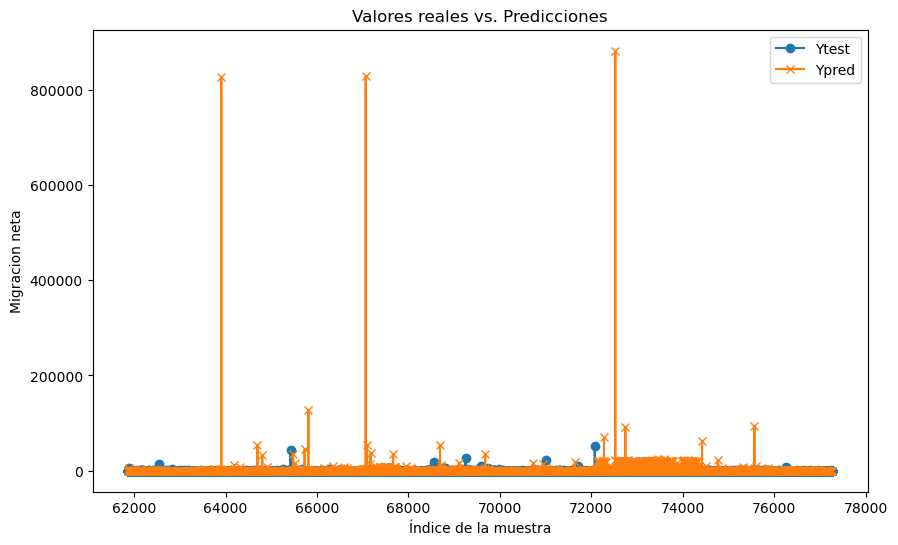

In [239]:
import matplotlib.pyplot as plt

# Graficar Ytest y Ypred
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Ytest', marker='o')
plt.plot(y_test.index, y_pred, label='Ypred', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Migracion neta')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.show()

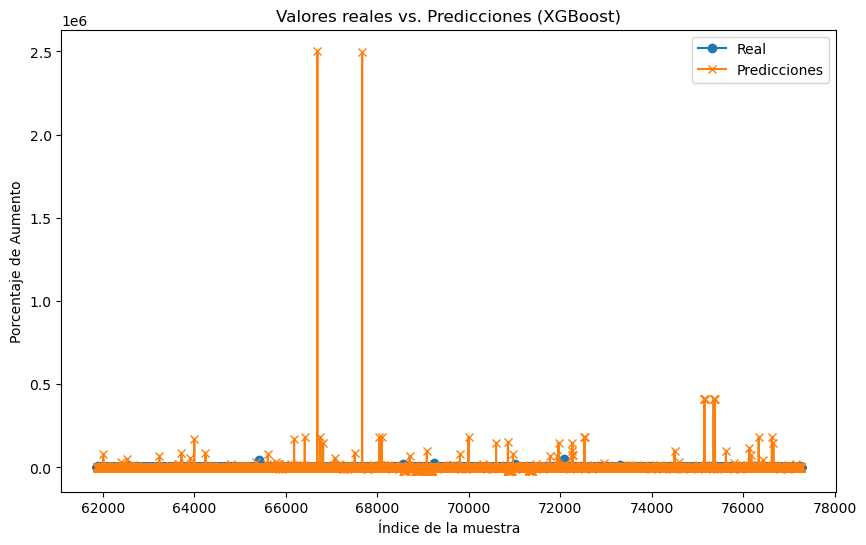

Error cuadrático medio: 963315043.472348


In [294]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Eliminar las filas con valores nulos en la columna objetivo 'Porcentaje_Aumento'
final_modelo_stock_sin_80_na_imputed.dropna(subset=['Porcentaje_Aumento'], inplace=True)

# Definir features y target
X = final_modelo_stock_sin_80_na_imputed.drop(['Migrant stock', 'Destination', 'Origin', 'Porcentaje_Aumento','Tasa de cambio_origin','Crecimiento PBI_origin'], axis=1)
y = final_modelo_stock_sin_80_na_imputed['Porcentaje_Aumento']

# Dividir los datos en conjuntos de entrenamiento y prueba y hacer dummies
X = pd.get_dummies(X, columns=['ISO3_origin', 'ISO3_dest'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

# Crear un modelo XGBoost para regresión
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # Puedes ajustar los hiperparámetros según sea necesario

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Visualizar las predicciones y los valores reales
df_predicciones = pd.DataFrame({'Real': y_test, 'Predicciones': y_pred})

# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.plot(df_predicciones.index, df_predicciones['Real'], label='Real', marker='o')
plt.plot(df_predicciones.index, df_predicciones['Predicciones'], label='Predicciones', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Porcentaje de Aumento')
plt.title('Valores reales vs. Predicciones (XGBoost)')
plt.legend()
plt.show()

# Calcular la métrica de error (puedes usar cualquier otra métrica según tus necesidades)
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio:", mse)


In [295]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [296]:
r2

-1925.3839096781394

In [297]:
mae

2356.7703984211194

### Modelo corredor con menos Features

In [41]:
final_modelo_stock_sin_80_na_imputed.columns

Index(['Destination', 'ISO3_dest', 'Origin', 'ISO3_origin', 'Year',
       'Migrant stock', 'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin', 'Tasa de cambio_origin',
       'Pobreza_origin', 'Mortalidad_origin', 'Ingresos_dest',
       'Electricidad_dest', 'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest', 'Tasa de cambio_dest',
       'Pobreza_dest', 'Mortalidad_dest'],
      dtype='object')

In [42]:
features=['ISO3_dest', 'ISO3_origin', 'Year','Ingresos_origin',
  
       'Crecimiento PBI per cápita_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin',
       'Pobreza_origin', 'Mortalidad_origin', 
          
          
          'Ingresos_dest','Crecimiento PBI per cápita_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest',
       'Pobreza_dest', 'Mortalidad_dest']

In [43]:
features_2=['ISO3_dest', 'ISO3_origin', 'Year',
          'Ingresos_dest','Crecimiento PBI per cápita_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest',
       'Pobreza_dest', 'Mortalidad_dest']

In [200]:
# Eliminar las filas con valores nulos en la columna objetivo 'Migracion neta'
final_modelo_stock_sin_80_na_imputed.dropna(subset=['Migrant stock'], inplace=True)

# Definir features y target
X = final_modelo_stock_sin_80_na_imputed[features_2]
#X = final_modelo_stock_sin_80_na_imputed.drop(['Migrant stock','Destination','Origin'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = final_modelo_stock_sin_80_na_imputed['Migrant stock']  # Etiquetas



# Dividir los datos en conjuntos de entrenamiento y prueba y hacer dummies
X = pd.get_dummies(X, columns=['ISO3_origin','ISO3_dest'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)

# Crear un modelo BaggingRegressor
bagging_model = BaggingRegressor(random_state=0)

# Entrenar el modelo
mejor_modelo=bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)



In [181]:
r2

0.8567118712272681

In [182]:
mse

3249871609.0131865

In [183]:
mae

9444.704637350771

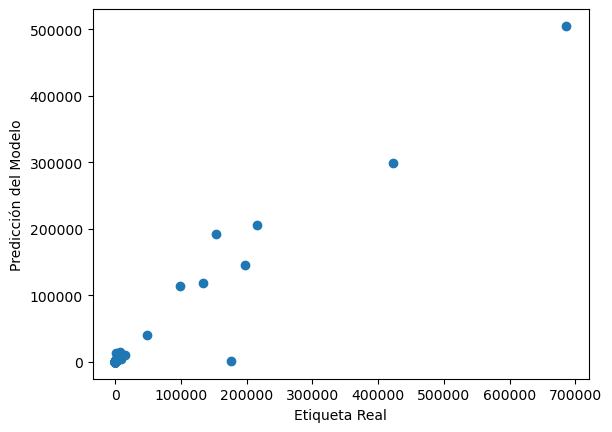

In [184]:
results_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred, 'Pais': X_test['ISO3_dest_ARG'],'Year':X_test['Year']})

# Filtrar los resultados para un país específico
pais_seleccionado = 1  # Reemplaza con el nombre de tu país de interés
results_pais = results_df[results_df['Pais'] == pais_seleccionado]

# Visualizar los resultados (puedes ajustar esto según tus necesidades)
plt.scatter(results_pais['Y_test'], results_pais['Y_pred'])
plt.xlabel('Etiqueta Real')
plt.ylabel('Predicción del Modelo')
#plt.title(f'Predicciones para {Argentina}')
plt.show()

In [194]:
results_df['Y_pred_factor_correccion']=results_df['Y_pred'] + 0.3*results_df['Y_pred']

In [197]:
salida =results_df[results_df['Pais']==1]

In [198]:
salida

,Y_test,Y_pred,Pais,Year,Y_pred_factor_correccion
76637,307,496.5,1,2020,645.45
76638,20,27.9,1,2020,36.27
76639,535,801.3,1,2020,1041.69
76640,24,36.7,1,2020,47.71
76641,2,5.9,1,2020,7.67
...,...,...,...,...,...
76956,2,5.9,1,2020,7.67
76957,5,7.4,1,2020,9.62
76958,817,1168.8,1,2020,1519.44
76959,7386,15393.5,1,2020,20011.55


In [199]:
salida.nlargest(10,'Y_test')

,Y_test,Y_pred,Pais,Year,Y_pred_factor_correccion
76946,685714,505122.6,1,2020,656659.38
76677,423136,299575.8,1,2020,389448.54
76642,215198,205912.0,1,2020,267685.60
76947,197226,145133.0,1,2020,188672.90
76948,176369,1993.2,1,2020,2591.16
76725,153824,191923.7,1,2020,249500.81
76934,134043,118747.1,1,2020,154371.23
76935,99006,114474.3,1,2020,148816.59
76678,49267,41177.0,1,2020,53530.10
76643,14537,10274.6,1,2020,13356.98


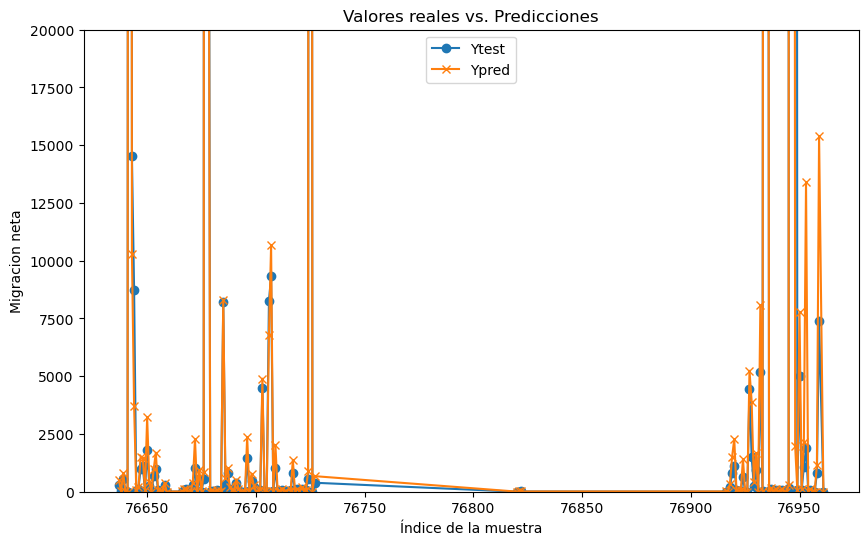

In [206]:
import matplotlib.pyplot as plt

# Graficar Ytest y Ypred
plt.figure(figsize=(10, 6))
# Escalar el eje y
escala_maxima = 20000
plt.ylim(0, escala_maxima)
plt.plot(salida.index, salida['Y_test'], label='Ytest', marker='o')
plt.plot(salida.index, salida['Y_pred'], label='Ypred', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Migracion neta')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.show()

In [48]:
# Eliminar las filas con valores nulos en la columna objetivo 'Migracion neta'
final_modelo_stock_sin_80_na_imputed.dropna(subset=['Migrant stock'], inplace=True)

# Definir features y target
X = final_modelo_stock_sin_80_na_imputed[features_2]
#X = final_modelo_stock_sin_80_na_imputed.drop(['Migrant stock','Destination','Origin'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = final_modelo_stock_sin_80_na_imputed['Migrant stock']  # Etiquetas



# Dividir los datos en conjuntos de entrenamiento y prueba y hacer dummies
X = pd.get_dummies(X, columns=['ISO3_origin','ISO3_dest'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)

# Crear un modelo BaggingRegressor
bagging_model = BaggingRegressor(random_state=0)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [50]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 3249871609.0131865
R-squared (R2): 0.8567118712272681
Mean Absolute Error (MAE): 9444.704637350771


In [51]:
X_test.columns

Index(['Year', 'Ingresos_dest', 'Crecimiento PBI per cápita_dest',
       'Importaciones_dest', 'Desempleados con educación avanzada_dest',
       'Pobreza_dest', 'Mortalidad_dest', 'ISO3_origin_ABW', 'ISO3_origin_AFG',
       'ISO3_origin_AGO',
       ...
       'ISO3_dest_VGB', 'ISO3_dest_VIR', 'ISO3_dest_VNM', 'ISO3_dest_VUT',
       'ISO3_dest_WLF', 'ISO3_dest_WSM', 'ISO3_dest_YEM', 'ISO3_dest_ZAF',
       'ISO3_dest_ZMB', 'ISO3_dest_ZWE'],
      dtype='object', length=468)

In [174]:
from xgboost.sklearn import XGBRegressor

# Resto de tu código aquí...

# Crear un modelo XGBRegressor
xgb_model = XGBRegressor()

# Entrenar el modelo
fit_modelo = xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R cuadrado)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 3401671699.7282357
R-squared (R2): 0.850018944994193


In [55]:
fit_modelo.save_model('xgb_model.json')

In [56]:
X_test

,Year,Ingresos_dest,Crecimiento PBI per cápita_dest,Importaciones_dest,Desempleados con educación avanzada_dest,Pobreza_dest,Mortalidad_dest,ISO3_origin_ABW,ISO3_origin_AFG,ISO3_origin_AGO,ISO3_origin_AIA,ISO3_origin_ALB,ISO3_origin_AND,ISO3_origin_ARE,ISO3_origin_ARG,ISO3_origin_ARM,ISO3_origin_ASM,ISO3_origin_ATG,ISO3_origin_AUS,ISO3_origin_AUT,ISO3_origin_AZE,ISO3_origin_BDI,ISO3_origin_BEL,ISO3_origin_BEN,ISO3_origin_BES,ISO3_origin_BFA,ISO3_origin_BGD,ISO3_origin_BGR,ISO3_origin_BHR,ISO3_origin_BHS,ISO3_origin_BIH,ISO3_origin_BLR,ISO3_origin_BLZ,ISO3_origin_BMU,ISO3_origin_BOL,ISO3_origin_BRA,ISO3_origin_BRB,ISO3_origin_BRN,ISO3_origin_BTN,ISO3_origin_BWA,ISO3_origin_CAF,ISO3_origin_CAN,ISO3_origin_CHE,ISO3_origin_CHL,ISO3_origin_CHN,ISO3_origin_CIV,ISO3_origin_CMR,ISO3_origin_COD,ISO3_origin_COG,ISO3_origin_COK,ISO3_origin_COL,ISO3_origin_COM,ISO3_origin_CPV,ISO3_origin_CRI,ISO3_origin_CUB,ISO3_origin_CUW,ISO3_origin_CYM,ISO3_origin_CYP,ISO3_origin_CZE,ISO3_origin_DEU,ISO3_origin_DJI,ISO3_origin_DMA,ISO3_origin_DNK,ISO3_origin_DOM,ISO3_origin_DZA,ISO3_origin_ECU,ISO3_origin_EGY,ISO3_origin_ERI,ISO3_origin_ESH,ISO3_origin_ESP,ISO3_origin_EST,ISO3_origin_ETH,ISO3_origin_FIN,ISO3_origin_FJI,ISO3_origin_FLK,ISO3_origin_FRA,ISO3_origin_FRO,ISO3_origin_FSM,ISO3_origin_GAB,ISO3_origin_GBR,ISO3_origin_GEO,ISO3_origin_GHA,ISO3_origin_GIB,ISO3_origin_GIN,ISO3_origin_GLP,ISO3_origin_GMB,ISO3_origin_GNB,ISO3_origin_GNQ,ISO3_origin_GRC,ISO3_origin_GRD,ISO3_origin_GRL,ISO3_origin_GTM,ISO3_origin_GUF,ISO3_origin_GUM,ISO3_origin_GUY,ISO3_origin_HKG,ISO3_origin_HND,ISO3_origin_HRV,ISO3_origin_HTI,ISO3_origin_HUN,ISO3_origin_IDN,ISO3_origin_IMN,ISO3_origin_IND,ISO3_origin_IRL,ISO3_origin_IRN,ISO3_origin_IRQ,ISO3_origin_ISL,ISO3_origin_ISR,ISO3_origin_ITA,ISO3_origin_JAM,ISO3_origin_JOR,ISO3_origin_JPN,ISO3_origin_KAZ,ISO3_origin_KEN,ISO3_origin_KGZ,ISO3_origin_KHM,ISO3_origin_KIR,ISO3_origin_KNA,ISO3_origin_KOR,ISO3_origin_KWT,ISO3_origin_LAO,ISO3_origin_LBN,ISO3_origin_LBR,ISO3_origin_LBY,ISO3_origin_LCA,ISO3_origin_LIE,ISO3_origin_LKA,ISO3_origin_LSO,ISO3_origin_LTU,ISO3_origin_LUX,ISO3_origin_LVA,ISO3_origin_MAC,ISO3_origin_MAR,ISO3_origin_MCO,ISO3_origin_MDA,ISO3_origin_MDG,ISO3_origin_MDV,ISO3_origin_MEX,ISO3_origin_MHL,ISO3_origin_MKD,ISO3_origin_MLI,ISO3_origin_MLT,ISO3_origin_MMR,ISO3_origin_MNE,ISO3_origin_MNG,ISO3_origin_MNP,ISO3_origin_MOZ,ISO3_origin_MRT,ISO3_origin_MSR,ISO3_origin_MTQ,ISO3_origin_MUS,ISO3_origin_MWI,ISO3_origin_MYS,ISO3_origin_MYT,ISO3_origin_NAM,ISO3_origin_NCL,ISO3_origin_NER,ISO3_origin_NGA,ISO3_origin_NIC,ISO3_origin_NIU,ISO3_origin_NLD,ISO3_origin_NOR,ISO3_origin_NPL,ISO3_origin_NRU,ISO3_origin_NZL,ISO3_origin_OMN,ISO3_origin_PAK,ISO3_origin_PAN,ISO3_origin_PER,ISO3_origin_PHL,ISO3_origin_PLW,ISO3_origin_PNG,ISO3_origin_POL,ISO3_origin_PRI,ISO3_origin_PRK,ISO3_origin_PRT,ISO3_origin_PRY,ISO3_origin_PSE,ISO3_origin_PYF,ISO3_origin_QAT,ISO3_origin_REU,ISO3_origin_ROU,ISO3_origin_RUS,ISO3_origin_RWA,ISO3_origin_SAU,ISO3_origin_SDN,ISO3_origin_SEN,ISO3_origin_SGP,ISO3_origin_SHN,ISO3_origin_SLB,ISO3_origin_SLE,ISO3_origin_SLV,ISO3_origin_SMR,ISO3_origin_SOM,ISO3_origin_SPM,ISO3_origin_SRB,ISO3_origin_SSD,ISO3_origin_STP,ISO3_origin_SUR,ISO3_origin_SVK,ISO3_origin_SVN,ISO3_origin_SWE,ISO3_origin_SWZ,ISO3_origin_SXM,ISO3_origin_SYC,ISO3_origin_SYR,ISO3_origin_TCA,ISO3_origin_TCD,ISO3_origin_TGO,ISO3_origin_THA,ISO3_origin_TJK,ISO3_origin_TKL,ISO3_origin_TKM,ISO3_origin_TLS,ISO3_origin_TON,ISO3_origin_TTO,ISO3_origin_TUN,ISO3_origin_TUR,ISO3_origin_TUV,ISO3_origin_TZA,ISO3_origin_UGA,ISO3_origin_UKR,ISO3_origin_URY,ISO3_origin_USA,ISO3_origin_UZB,ISO3_origin_VAT,ISO3_origin_VCT,ISO3_origin_VEN,ISO3_origin_VGB,ISO3_origin_VIR,ISO3_origin_VNM,ISO3_origin_VUT,ISO3_origin_WLF,ISO3_origin_WSM,ISO3_origin_YEM,ISO3_origin_ZAF,ISO3_origin_ZMB,ISO3_origin_ZWE,ISO3_dest_ABW,ISO3_dest_AFG,ISO3_dest_AGO,ISO3_dest_AIA,ISO3_dest_ALB,ISO3_dest_AND,ISO3_dest_ARE,ISO3_dest_ARG,ISO3_dest_ARM,ISO3_dest_ASM,ISO3_dest_ATG,ISO3_dest

In [57]:
X_test

,Year,Ingresos_dest,Crecimiento PBI per cápita_dest,Importaciones_dest,Desempleados con educación avanzada_dest,Pobreza_dest,Mortalidad_dest,ISO3_origin_ABW,ISO3_origin_AFG,ISO3_origin_AGO,ISO3_origin_AIA,ISO3_origin_ALB,ISO3_origin_AND,ISO3_origin_ARE,ISO3_origin_ARG,ISO3_origin_ARM,ISO3_origin_ASM,ISO3_origin_ATG,ISO3_origin_AUS,ISO3_origin_AUT,ISO3_origin_AZE,ISO3_origin_BDI,ISO3_origin_BEL,ISO3_origin_BEN,ISO3_origin_BES,ISO3_origin_BFA,ISO3_origin_BGD,ISO3_origin_BGR,ISO3_origin_BHR,ISO3_origin_BHS,ISO3_origin_BIH,ISO3_origin_BLR,ISO3_origin_BLZ,ISO3_origin_BMU,ISO3_origin_BOL,ISO3_origin_BRA,ISO3_origin_BRB,ISO3_origin_BRN,ISO3_origin_BTN,ISO3_origin_BWA,ISO3_origin_CAF,ISO3_origin_CAN,ISO3_origin_CHE,ISO3_origin_CHL,ISO3_origin_CHN,ISO3_origin_CIV,ISO3_origin_CMR,ISO3_origin_COD,ISO3_origin_COG,ISO3_origin_COK,ISO3_origin_COL,ISO3_origin_COM,ISO3_origin_CPV,ISO3_origin_CRI,ISO3_origin_CUB,ISO3_origin_CUW,ISO3_origin_CYM,ISO3_origin_CYP,ISO3_origin_CZE,ISO3_origin_DEU,ISO3_origin_DJI,ISO3_origin_DMA,ISO3_origin_DNK,ISO3_origin_DOM,ISO3_origin_DZA,ISO3_origin_ECU,ISO3_origin_EGY,ISO3_origin_ERI,ISO3_origin_ESH,ISO3_origin_ESP,ISO3_origin_EST,ISO3_origin_ETH,ISO3_origin_FIN,ISO3_origin_FJI,ISO3_origin_FLK,ISO3_origin_FRA,ISO3_origin_FRO,ISO3_origin_FSM,ISO3_origin_GAB,ISO3_origin_GBR,ISO3_origin_GEO,ISO3_origin_GHA,ISO3_origin_GIB,ISO3_origin_GIN,ISO3_origin_GLP,ISO3_origin_GMB,ISO3_origin_GNB,ISO3_origin_GNQ,ISO3_origin_GRC,ISO3_origin_GRD,ISO3_origin_GRL,ISO3_origin_GTM,ISO3_origin_GUF,ISO3_origin_GUM,ISO3_origin_GUY,ISO3_origin_HKG,ISO3_origin_HND,ISO3_origin_HRV,ISO3_origin_HTI,ISO3_origin_HUN,ISO3_origin_IDN,ISO3_origin_IMN,ISO3_origin_IND,ISO3_origin_IRL,ISO3_origin_IRN,ISO3_origin_IRQ,ISO3_origin_ISL,ISO3_origin_ISR,ISO3_origin_ITA,ISO3_origin_JAM,ISO3_origin_JOR,ISO3_origin_JPN,ISO3_origin_KAZ,ISO3_origin_KEN,ISO3_origin_KGZ,ISO3_origin_KHM,ISO3_origin_KIR,ISO3_origin_KNA,ISO3_origin_KOR,ISO3_origin_KWT,ISO3_origin_LAO,ISO3_origin_LBN,ISO3_origin_LBR,ISO3_origin_LBY,ISO3_origin_LCA,ISO3_origin_LIE,ISO3_origin_LKA,ISO3_origin_LSO,ISO3_origin_LTU,ISO3_origin_LUX,ISO3_origin_LVA,ISO3_origin_MAC,ISO3_origin_MAR,ISO3_origin_MCO,ISO3_origin_MDA,ISO3_origin_MDG,ISO3_origin_MDV,ISO3_origin_MEX,ISO3_origin_MHL,ISO3_origin_MKD,ISO3_origin_MLI,ISO3_origin_MLT,ISO3_origin_MMR,ISO3_origin_MNE,ISO3_origin_MNG,ISO3_origin_MNP,ISO3_origin_MOZ,ISO3_origin_MRT,ISO3_origin_MSR,ISO3_origin_MTQ,ISO3_origin_MUS,ISO3_origin_MWI,ISO3_origin_MYS,ISO3_origin_MYT,ISO3_origin_NAM,ISO3_origin_NCL,ISO3_origin_NER,ISO3_origin_NGA,ISO3_origin_NIC,ISO3_origin_NIU,ISO3_origin_NLD,ISO3_origin_NOR,ISO3_origin_NPL,ISO3_origin_NRU,ISO3_origin_NZL,ISO3_origin_OMN,ISO3_origin_PAK,ISO3_origin_PAN,ISO3_origin_PER,ISO3_origin_PHL,ISO3_origin_PLW,ISO3_origin_PNG,ISO3_origin_POL,ISO3_origin_PRI,ISO3_origin_PRK,ISO3_origin_PRT,ISO3_origin_PRY,ISO3_origin_PSE,ISO3_origin_PYF,ISO3_origin_QAT,ISO3_origin_REU,ISO3_origin_ROU,ISO3_origin_RUS,ISO3_origin_RWA,ISO3_origin_SAU,ISO3_origin_SDN,ISO3_origin_SEN,ISO3_origin_SGP,ISO3_origin_SHN,ISO3_origin_SLB,ISO3_origin_SLE,ISO3_origin_SLV,ISO3_origin_SMR,ISO3_origin_SOM,ISO3_origin_SPM,ISO3_origin_SRB,ISO3_origin_SSD,ISO3_origin_STP,ISO3_origin_SUR,ISO3_origin_SVK,ISO3_origin_SVN,ISO3_origin_SWE,ISO3_origin_SWZ,ISO3_origin_SXM,ISO3_origin_SYC,ISO3_origin_SYR,ISO3_origin_TCA,ISO3_origin_TCD,ISO3_origin_TGO,ISO3_origin_THA,ISO3_origin_TJK,ISO3_origin_TKL,ISO3_origin_TKM,ISO3_origin_TLS,ISO3_origin_TON,ISO3_origin_TTO,ISO3_origin_TUN,ISO3_origin_TUR,ISO3_origin_TUV,ISO3_origin_TZA,ISO3_origin_UGA,ISO3_origin_UKR,ISO3_origin_URY,ISO3_origin_USA,ISO3_origin_UZB,ISO3_origin_VAT,ISO3_origin_VCT,ISO3_origin_VEN,ISO3_origin_VGB,ISO3_origin_VIR,ISO3_origin_VNM,ISO3_origin_VUT,ISO3_origin_WLF,ISO3_origin_WSM,ISO3_origin_YEM,ISO3_origin_ZAF,ISO3_origin_ZMB,ISO3_origin_ZWE,ISO3_dest_ABW,ISO3_dest_AFG,ISO3_dest_AGO,ISO3_dest_AIA,ISO3_dest_ALB,ISO3_dest_AND,ISO3_dest_ARE,ISO3_dest_ARG,ISO3_dest_ARM,ISO3_dest_ASM,ISO3_dest_ATG,ISO3_dest

In [58]:
X_test.shape

(16669, 468)

In [59]:
elemento = X_test.iloc[12761]

In [60]:
X_test.to_csv('elemento.csv')

### Modelo para predecir cantidad de inmigrantes total

In [61]:
Stock_migrantes_agrupado=pd.read_csv('Stock_migrantes_agrupado')

In [62]:
Stock_migrantes_agrupado=Stock_migrantes_agrupado.drop(columns='Unnamed: 0')

In [63]:
Stock_migrantes_agrupado

,ISO3_dest,Year,ingreso_stock,Country Code,Ingresos,Electricidad,Contaminación,Crecimiento PBI,Crecimiento PBI per cápita,Desempleo Hombre,Desempleo mujeres,Gasto PBI,Importaciones,Migracion neta,Desempleados con educación avanzada,Tasa de cambio,Pobreza,Mortalidad
0,ABW,1990,11099,ABW,NaN,100.000000,NaN,3.961402,2.195805,NaN,NaN,NaN,5.810000e+08,879.0,NaN,1.790000,NaN,7.100
1,ABW,1995,19002,ABW,NaN,100.000000,NaN,2.547144,-0.567202,NaN,NaN,NaN,1.597000e+09,1598.0,NaN,1.790000,NaN,6.366
2,ABW,2000,26897,ABW,NaN,91.660398,NaN,7.616589,4.918354,6.50,NaN,NaN,2.582000e+09,1235.0,NaN,1.790000,NaN,6.335
3,ABW,2005,30144,ABW,NaN,100.000000,NaN,-0.384927,-1.379148,NaN,NaN,NaN,4.288000e+09,579.0,NaN,1.790000,NaN,6.839
4,ABW,2010,32812,ABW,NaN,93.356292,NaN,-2.732596,-3.827013,10.77,NaN,NaN,1.394000e+09,498.0,NaN,1.790000,NaN,6.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,ZWE,2000,361947,ZWE,NaN,33.678932,100.0,-3.059190,-4.027576,NaN,4.640,NaN,1.863000e+09,-137321.0,NaN,0.044468,NaN,16.801
1606,ZWE,2005,319910,ZWE,NaN,36.121422,100.0,-5.711084,-6.203725,NaN,4.751,NaN,2.346000e+09,-164732.0,NaN,22.389040,NaN,16.820
1607,ZWE,2010,286642,ZWE,NaN,38.886208,100.0,21.452061,19.938982,NaN,5.737,16.120873,5.337000e+09,-133402.0,NaN,NaN,NaN,13.281
1608,ZWE,2015,288208,ZWE,NaN,33.700000,100.0,2.023650,-0.132760,NaN,5.530,21.809416,6.053000e+09,-59918.0,NaN,NaN,NaN,8.774


In [302]:
umbral_stock_migrantes = len(Stock_migrantes_agrupado.columns) * 0.7
Stock_migrantes_agrupado_sin_na= Stock_migrantes_agrupado.dropna(thresh=umbral_stock_migrantes)

In [301]:
Stock_migrantes_agrupado_sin_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 2 to 1609
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ISO3_dest                            1227 non-null   object 
 1   Year                                 1227 non-null   int64  
 2   ingreso_stock                        1227 non-null   int64  
 3   Country Code                         1227 non-null   object 
 4   Ingresos                             95 non-null     float64
 5   Electricidad                         1128 non-null   float64
 6   Contaminación                        1007 non-null   float64
 7   Crecimiento PBI                      1217 non-null   float64
 8   Crecimiento PBI per cápita           1217 non-null   float64
 9   Desempleo Hombre                     707 non-null    float64
 10  Desempleo mujeres                    1067 non-null   float64
 11  Gasto PBI                     

In [66]:
Stock_migrantes_agrupado_sin_na.columns

Index(['ISO3_dest', 'Year', 'ingreso_stock', 'Country Code', 'Ingresos',
       'Electricidad', 'Contaminación', 'Crecimiento PBI',
       'Crecimiento PBI per cápita', 'Desempleo Hombre', 'Desempleo mujeres',
       'Gasto PBI', 'Importaciones', 'Migracion neta',
       'Desempleados con educación avanzada', 'Tasa de cambio', 'Pobreza',
       'Mortalidad'],
      dtype='object')

In [67]:
# columnas a imputar son las siguientes
columns_to_impute = ['ingreso_stock', 'Ingresos',
       'Electricidad', 'Contaminación', 'Crecimiento PBI',
       'Crecimiento PBI per cápita', 'Desempleo Hombre', 'Desempleo mujeres',
       'Gasto PBI', 'Importaciones',
       'Desempleados con educación avanzada', 'Tasa de cambio', 'Pobreza',
       'Mortalidad']

# Copiar el DataFrame original para no modificarlo directamente
Stock_migrantes_agrupado_sin_na_imputed =Stock_migrantes_agrupado_sin_na.copy()

# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Elige el número de vecinos que deseas considerar

# Ajustar y transformar los datos utilizando KNNImputer
Stock_migrantes_agrupado_sin_na_imputed[columns_to_impute] = imputer.fit_transform(Stock_migrantes_agrupado_sin_na_imputed[columns_to_impute])

In [68]:
Stock_migrantes_agrupado_sin_na_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 2 to 1609
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ISO3_dest                            1227 non-null   object 
 1   Year                                 1227 non-null   int64  
 2   ingreso_stock                        1227 non-null   float64
 3   Country Code                         1227 non-null   object 
 4   Ingresos                             1227 non-null   float64
 5   Electricidad                         1227 non-null   float64
 6   Contaminación                        1227 non-null   float64
 7   Crecimiento PBI                      1227 non-null   float64
 8   Crecimiento PBI per cápita           1227 non-null   float64
 9   Desempleo Hombre                     1227 non-null   float64
 10  Desempleo mujeres                    1227 non-null   float64
 11  Gasto PBI                     

In [69]:
# Ordenar el DataFrame por la columna 'Year'
Stock_migrantes_agrupado_sin_na_imputed.sort_values('Year', inplace=True)

# Restablecer el índice
Stock_migrantes_agrupado_sin_na_imputed.reset_index(drop=True, inplace=True)

In [70]:
Stock_migrantes_agrupado_sin_na_imputed['ingreso_stock']=Stock_migrantes_agrupado_sin_na_imputed['ingreso_stock'].astype(int)

In [71]:
Stock_migrantes_agrupado_sin_na_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ISO3_dest                            1227 non-null   object 
 1   Year                                 1227 non-null   int64  
 2   ingreso_stock                        1227 non-null   int32  
 3   Country Code                         1227 non-null   object 
 4   Ingresos                             1227 non-null   float64
 5   Electricidad                         1227 non-null   float64
 6   Contaminación                        1227 non-null   float64
 7   Crecimiento PBI                      1227 non-null   float64
 8   Crecimiento PBI per cápita           1227 non-null   float64
 9   Desempleo Hombre                     1227 non-null   float64
 10  Desempleo mujeres                    1227 non-null   float64
 11  Gasto PBI                     

In [72]:
# Eliminar las filas con valores nulos en la columna objetivo 'Migracion neta'
Stock_migrantes_agrupado_sin_na_imputed.dropna(subset=['ingreso_stock'], inplace=True)

# Definir features y target
X = Stock_migrantes_agrupado_sin_na_imputed.drop(['ingreso_stock','Migracion neta','Country Code','Tasa de cambio','Desempleo mujeres','Desempleo Hombre','Contaminación','Crecimiento PBI','Gasto PBI'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = Stock_migrantes_agrupado_sin_na_imputed['ingreso_stock']  # Etiquetas



# Dividir los datos en conjuntos de entrenamiento y prueba y hacer dummies
X = pd.get_dummies(X, columns=['ISO3_dest'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)

# Crear un modelo BaggingRegressor
bagging_model = BaggingRegressor(random_state=0)

# Entrenar el modelo
fit_modelo_bag=bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [74]:
r2

0.8543291197579159

In [75]:
mse

1874632847165.8308

In [76]:
mae

592431.3361788618

In [77]:
from xgboost.sklearn import XGBRegressor

# Resto de tu código aquí...

# Crear un modelo XGBRegressor
xgb_model = XGBRegressor()

# Entrenar el modelo
fit_modelo_xgb = xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R cuadrado)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Imprimir los resultados
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (Mae):", mae)

Mean Squared Error (MSE): 709702780340.4192
R-squared (R2): 0.9448515858031916
Mean Absolute Error (Mae): 410604.6720561206


In [78]:
y_test.mean()

1221344.219512195

In [79]:
fit_modelo_xgb.save_model('xgb_model_1.json')

In [80]:
X_test.to_csv('para_probar')

In [81]:
salida = X_test[X_test['ISO3_dest_ARG']==1]

In [82]:
columnas=X_train.columns

In [83]:
columnas

Index(['Year', 'Ingresos', 'Electricidad', 'Crecimiento PBI per cápita',
       'Importaciones', 'Desempleados con educación avanzada', 'Pobreza',
       'Mortalidad', 'ISO3_dest_ABW', 'ISO3_dest_AFG',
       ...
       'ISO3_dest_VCT', 'ISO3_dest_VEN', 'ISO3_dest_VIR', 'ISO3_dest_VNM',
       'ISO3_dest_VUT', 'ISO3_dest_WSM', 'ISO3_dest_YEM', 'ISO3_dest_ZAF',
       'ISO3_dest_ZMB', 'ISO3_dest_ZWE'],
      dtype='object', length=212)

In [84]:
df = pd.DataFrame([0]*len(columnas), index=columnas).T

In [85]:
df.shape

(1, 212)

In [86]:
df.to_csv('para_llenar_1')

In [87]:
X_test.shape

(246, 212)

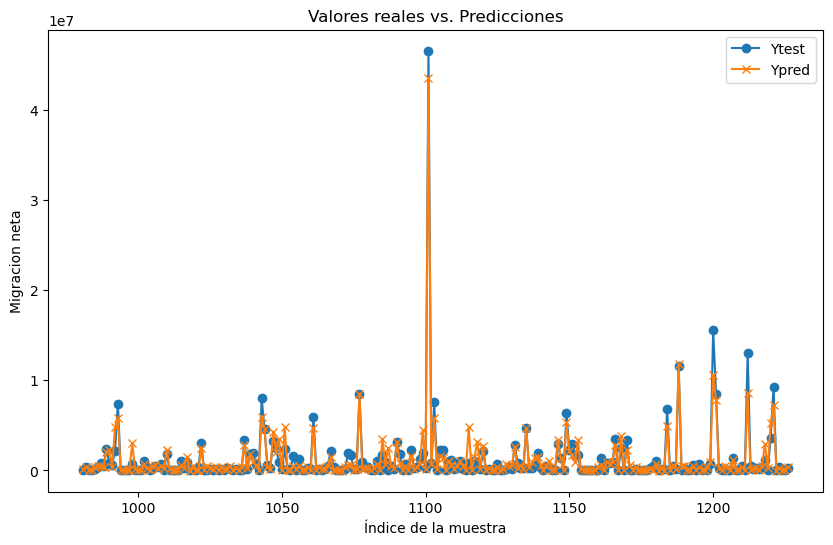

In [88]:
import matplotlib.pyplot as plt

# Graficar Ytest y Ypred
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Ytest', marker='o')
plt.plot(y_test.index, y_pred, label='Ypred', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Migracion neta')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.show()

In [89]:
df_salida = pd.DataFrame({'Y_pred': y_pred, 'y_test': y_test})

In [90]:
df_salida['resta']= df_salida['Y_pred'] - df_salida['y_test']

In [91]:
df_salida['resta'].mean()

-10057.77064725054

In [92]:
df_salida

,Y_pred,y_test,resta
981,123358.062500,4208,119150.062500
982,429999.312500,397638,32361.312500
983,38237.644531,13416,24821.644531
984,23888.869141,11204,12684.869141
985,414169.281250,148532,265637.281250
...,...,...,...
1222,-29134.048828,2938,-32072.048828
1223,326612.718750,405666,-79053.281250
1224,16193.288086,964,15229.288086
1225,44364.449219,65487,-21122.550781


In [93]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Crear un modelo XGBRegressor
xgb_model = XGBRegressor()

# Definir la búsqueda de cuadrícula con MAE como métrica
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)

# Ajustar el modelo con la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_xgb_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_xgb_model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R cuadrado)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir los resultados
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Imprimir los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


Mean Squared Error (MSE): 661549238220.567
R-squared (R2): 0.9485934219061801
Mean Absolute Error (MAE): 386779.76599790994
Mejores hiperparámetros: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 1000}


In [94]:
import optuna
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

# Definir la función de objetivo para la optimización de Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3)
    }
    
    xgb_model = XGBRegressor(**param)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros
best_params = study.best_params

# Crear el modelo final con los mejores hiperparámetros
final_xgb_model = XGBRegressor(**best_params)
best_model = final_xgb_model.fit(X_train, y_train)
y_pred = final_xgb_model.predict(X_test)

# Calcular el MAE con el modelo final
mae_final = mean_absolute_error(y_test, y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros:", best_params)
print("MAE con los mejores hiperparámetros:", mae_final)



[I 2023-11-12 20:28:21,871] A new study created in memory with name: no-name-09294560-5717-4b5e-9b23-d9a065ced006
[I 2023-11-12 20:28:25,827] Trial 0 finished with value: 428929.5579485389 and parameters: {'n_estimators': 835, 'max_depth': 8, 'learning_rate': 0.13641777219943652}. Best is trial 0 with value: 428929.5579485389.
[I 2023-11-12 20:28:26,396] Trial 1 finished with value: 491820.03367949696 and parameters: {'n_estimators': 118, 'max_depth': 6, 'learning_rate': 0.08959956714402004}. Best is trial 0 with value: 428929.5579485389.
[I 2023-11-12 20:28:27,288] Trial 2 finished with value: 465120.11624269566 and parameters: {'n_estimators': 185, 'max_depth': 7, 'learning_rate': 0.08891747386785577}. Best is trial 0 with value: 428929.5579485389.
[I 2023-11-12 20:28:30,279] Trial 3 finished with value: 450172.7834800162 and parameters: {'n_estimators': 684, 'max_depth': 7, 'learning_rate': 0.04823650019344469}. Best is trial 0 with value: 428929.5579485389.
[I 2023-11-12 20:28:31,5

Mejores hiperparámetros: {'n_estimators': 994, 'max_depth': 3, 'learning_rate': 0.16399091484233821}
MAE con los mejores hiperparámetros: 341253.00617708033


In [95]:
best_model.save_model('xgb_model_final.json')

In [101]:
results_df[results_df['Pais']==1]

,Y_test,Y_pred,Pais
1105,2237152,1850447.375,1


In [303]:
results_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred, 'Pais': X_test['ISO3_dest_ARG']})

# Filtrar los resultados para un país específico
pais_seleccionado = 1  # Reemplaza con el nombre de tu país de interés
results_pais = results_df[results_df['Pais'] == pais_seleccionado]

# Visualizar los resultados (puedes ajustar esto según tus necesidades)
plt.scatter(results_pais['Y_test'], results_pais['Y_pred'])
plt.xlabel('Etiqueta Real')
plt.ylabel('Predicción del Modelo')
plt.title(f'Predicciones para {Argentina')
plt.show()


,Y_test,Y_pred_final,Pais
2728,17210.0,1.461073e+04,0
2729,27063.0,-6.848945e+03,0
2730,-11139.0,-2.508167e+04,0
2731,-27234.0,-2.648496e+04,0
2732,17109.0,5.182407e+03,0
...,...,...,...
3406,35894.0,2.075353e+04,0
3407,1242327.0,1.485485e+06,0
3408,92645.0,1.632724e+05,0
3409,-29118.0,-2.450797e+04,0
